In [25]:
# import necessary modules
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('output.csv')

In [3]:
df.head()

,brand,model,transmission,age,fuel,engine,km,owner,price,location,mileage,power,seats,type
0,mahindra,thar,manual,4.0,diesel,2184.0,11003.0,1.0,1231000.0,NaN,NaN,NaN,NaN,NaN
1,hyundai,verna,manual,6.0,petrol,1591.0,66936.0,1.0,786000.0,NaN,NaN,NaN,NaN,NaN
2,tata,harrier,manual,2.0,diesel,1956.0,27990.0,1.0,1489000.0,NaN,NaN,NaN,NaN,NaN
3,honda,city,automatic,1.0,petrol,1498.0,5061.0,1.0,1227000.0,NaN,NaN,NaN,NaN,NaN
4,ford,ecosport,manual,3.0,diesel,1498.0,23480.0,1.0,887000.0,NaN,NaN,NaN,NaN,NaN


In [4]:
df.isnull().sum()

brand               1
model               1
transmission        0
age                 1
fuel                0
engine           8132
km                  0
owner           15381
price               0
location        18399
mileage         10820
power           10927
seats            2847
type            24185
dtype: int64

In [5]:
df.shape

(32200, 14)

In [6]:
df.sample(5)

,brand,model,transmission,age,fuel,engine,km,owner,price,location,mileage,power,seats,type
15279,maruti,swift,manual,9.0,petrol,1197.0,35000.0,NaN,395000.0,NaN,18.60,85.80,5.0,NaN
27554,maruti,celerio,manual,6.0,cng,NaN,51390.0,1.0,433000.0,maharashtra,NaN,NaN,5.0,hatchback
23548,volkswagen,polo,manual,9.0,diesel,1199.0,104233.0,NaN,380000.0,NaN,22.07,73.90,5.0,NaN
32040,hyundai,venue,manual,3.0,diesel,NaN,58177.0,1.0,1155000.0,telangana,NaN,NaN,5.0,suv
7237,hyundai,grand,manual,7.0,petrol,1197.0,51223.0,1.0,566000.0,kochi,18.90,81.86,5.0,NaN


In [7]:
# dropping unnecessary columns

df.drop(columns=['brand','model','location'],axis=1,inplace=True)

In [8]:
df.head(5)

,transmission,age,fuel,engine,km,owner,price,mileage,power,seats,type
0,manual,4.0,diesel,2184.0,11003.0,1.0,1231000.0,NaN,NaN,NaN,NaN
1,manual,6.0,petrol,1591.0,66936.0,1.0,786000.0,NaN,NaN,NaN,NaN
2,manual,2.0,diesel,1956.0,27990.0,1.0,1489000.0,NaN,NaN,NaN,NaN
3,automatic,1.0,petrol,1498.0,5061.0,1.0,1227000.0,NaN,NaN,NaN,NaN
4,manual,3.0,diesel,1498.0,23480.0,1.0,887000.0,NaN,NaN,NaN,NaN


Dropping "owner" column beacuase It may give the idea about how old the car is and If you look at the dataset we also have "age" column which is
providing the same information

In [9]:
# drop "owner" column
df.drop('owner',axis=1,inplace=True)

In [10]:
df.head(5)

,transmission,age,fuel,engine,km,price,mileage,power,seats,type
0,manual,4.0,diesel,2184.0,11003.0,1231000.0,NaN,NaN,NaN,NaN
1,manual,6.0,petrol,1591.0,66936.0,786000.0,NaN,NaN,NaN,NaN
2,manual,2.0,diesel,1956.0,27990.0,1489000.0,NaN,NaN,NaN,NaN
3,automatic,1.0,petrol,1498.0,5061.0,1227000.0,NaN,NaN,NaN,NaN
4,manual,3.0,diesel,1498.0,23480.0,887000.0,NaN,NaN,NaN,NaN


Preprocessing for visualization

In [11]:
# Encoding categoricals variables
encode  = LabelEncoder()

df['transmission'] = encode.fit_transform(df['transmission'])
df['type'] = encode.fit_transform(df['type'])
df['fuel'] = encode.fit_transform(df['fuel'])

In [12]:
df.corr()

,transmission,age,fuel,engine,km,price,mileage,power,seats,type
transmission,1.000000,0.066623,0.007418,-0.356866,0.051695,-0.476715,0.301783,-0.579794,0.041873,-0.072403
age,0.066623,1.000000,-0.009192,0.142628,0.250923,-0.206513,-0.309554,0.070522,0.007917,-0.012848
fuel,0.007418,-0.009192,1.000000,-0.453173,-0.185644,-0.283738,-0.153884,-0.273627,-0.320337,-0.229313
engine,-0.356866,0.142628,-0.453173,1.000000,0.156273,0.628310,-0.616014,0.825400,0.515536,NaN
km,0.051695,0.250923,-0.185644,0.156273,1.000000,-0.045677,-0.088618,0.048925,0.139800,0.027278
price,-0.476715,-0.206513,-0.283738,0.628310,-0.045677,1.000000,-0.322014,0.769534,0.154632,0.162213
mileage,0.301783,-0.309554,-0.153884,-0.616014,-0.088618,-0.322014,1.000000,-0.532878,-0.392785,NaN
power,-0.579794,0.070522,-0.273627,0.825400,0.048925,0.769534,-0.532878,1.000000,0.163542,NaN
seats,0.041873,0.007917,-0.320337,0.515536,0.139800,0.154632,-0.392785,0.163542,1.000000,0.167854
type,-0.072403,-0.012848,-0.229313,NaN,0.027278,0.162213,NaN,NaN,0.167854,1.000000


<Axes: >

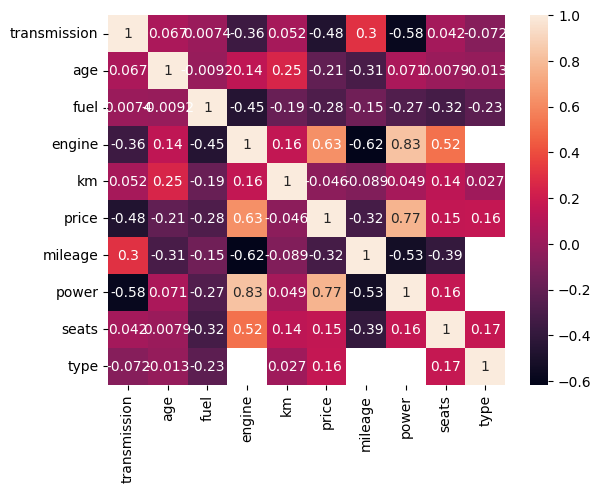

In [13]:
sns.heatmap(df.corr(), annot=True)

By looking at thr above correlation heatmap, we are looking that there is a multicollinearity between input columns 

Using y-data profiling for getting basic information about our dataset

In [14]:
# from ydata_profiling import ProfileReport 

# profile = ProfileReport(df)
# profile.to_file(output_file = 'home.html')

<Axes: >

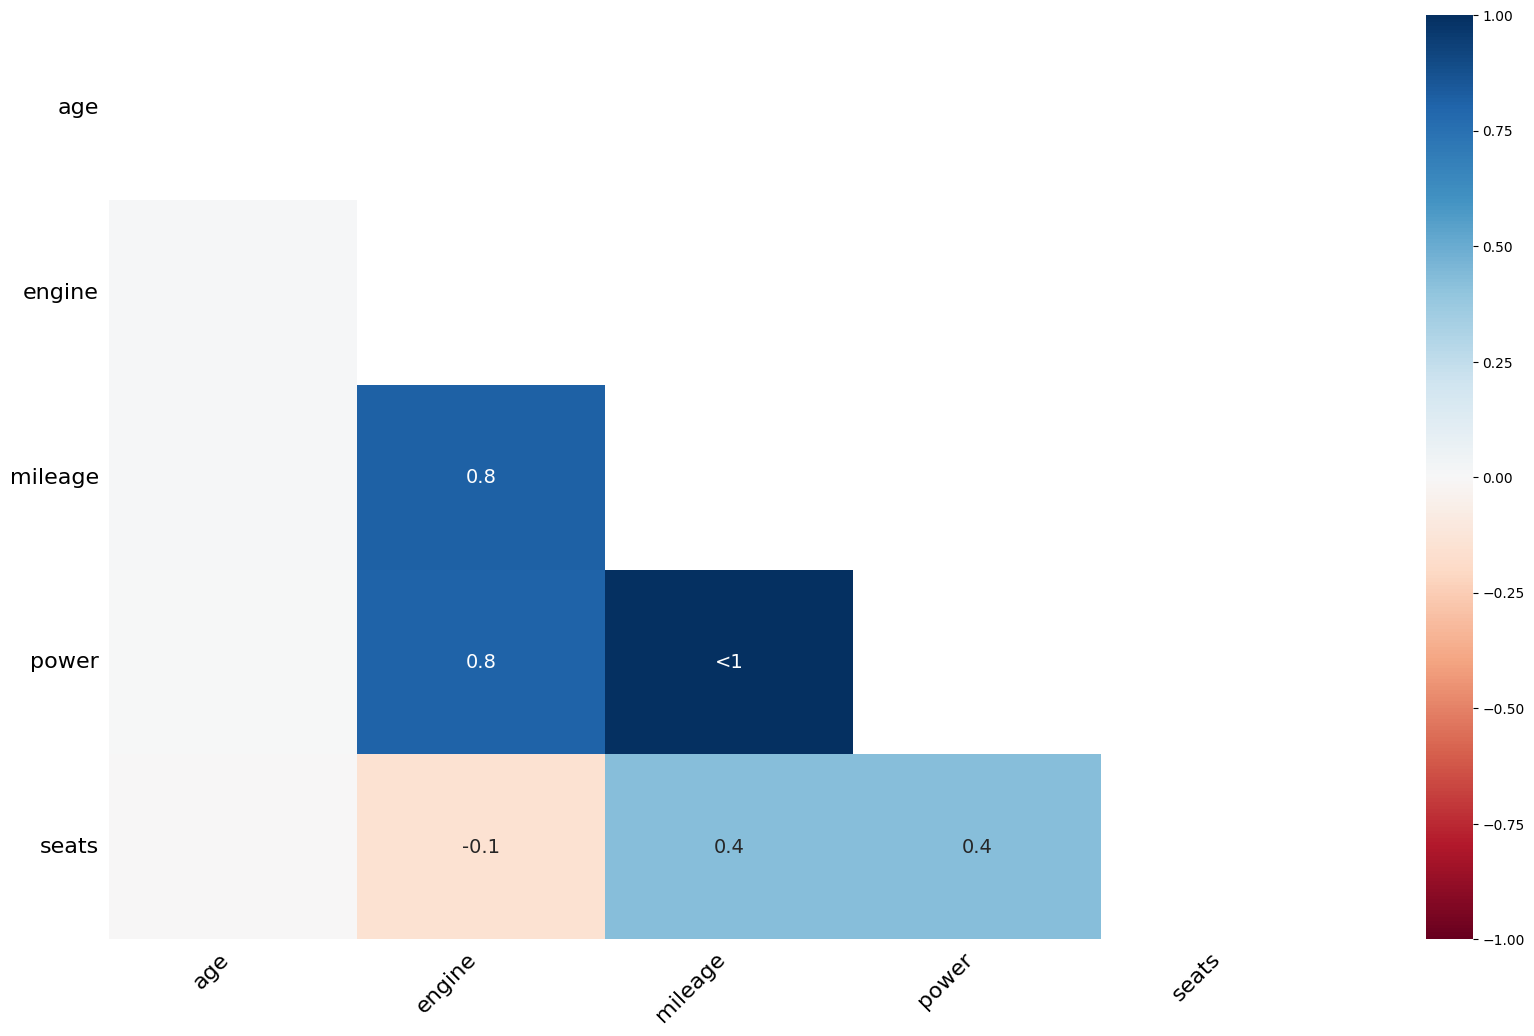

In [15]:
msno.heatmap(df)

In [16]:
df.head()

,transmission,age,fuel,engine,km,price,mileage,power,seats,type
0,1,4.0,1,2184.0,11003.0,1231000.0,NaN,NaN,NaN,5
1,1,6.0,4,1591.0,66936.0,786000.0,NaN,NaN,NaN,5
2,1,2.0,1,1956.0,27990.0,1489000.0,NaN,NaN,NaN,5
3,0,1.0,4,1498.0,5061.0,1227000.0,NaN,NaN,NaN,5
4,1,3.0,1,1498.0,23480.0,887000.0,NaN,NaN,NaN,5


In [17]:
df.isnull().sum()

transmission        0
age                 1
fuel                0
engine           8132
km                  0
price               0
mileage         10820
power           10927
seats            2847
type                0
dtype: int64

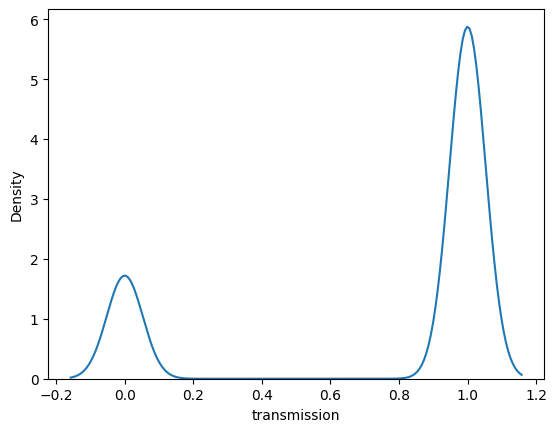

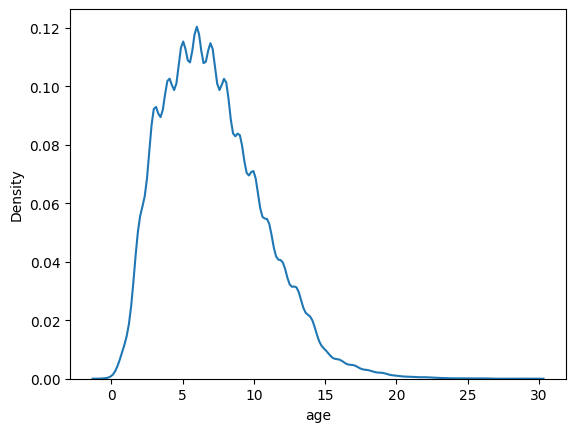

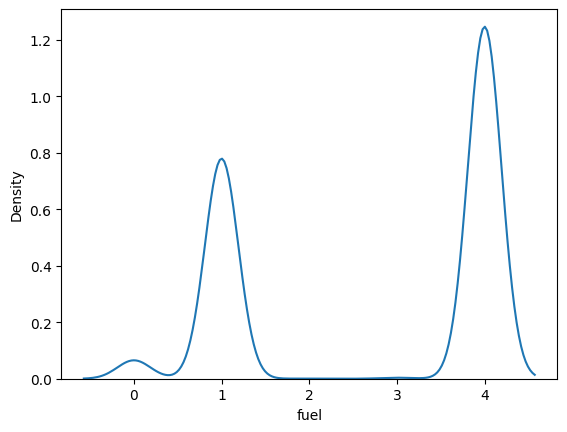

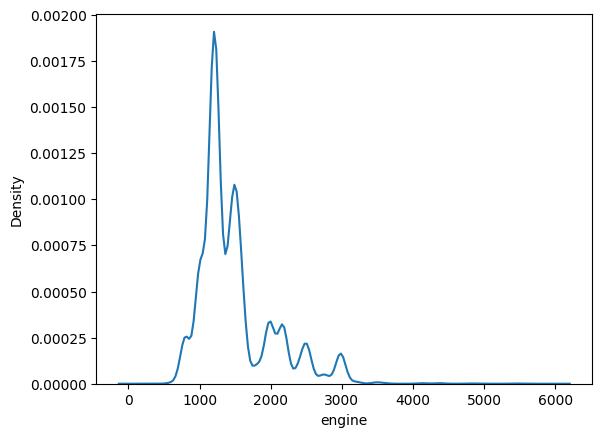

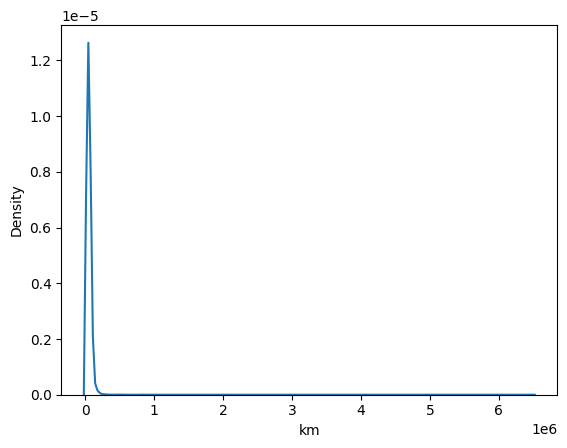

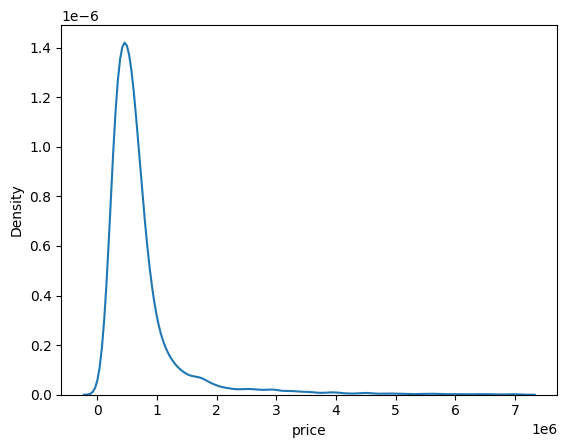

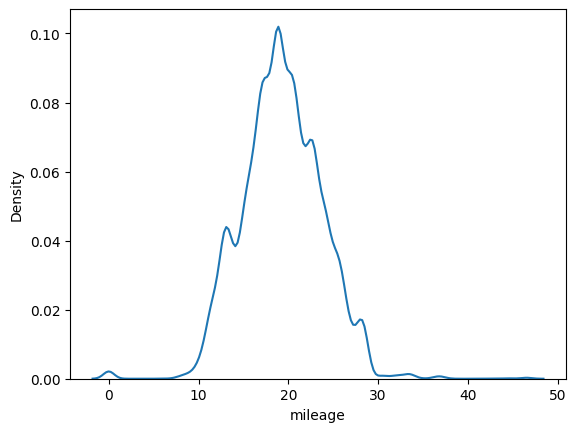

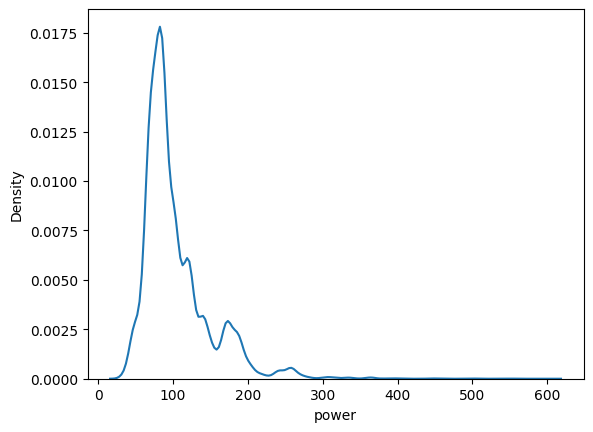

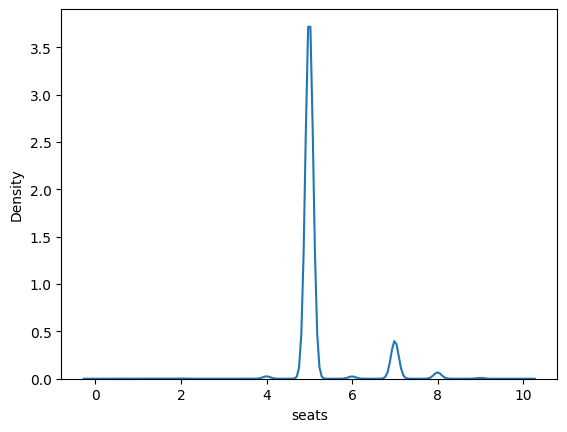

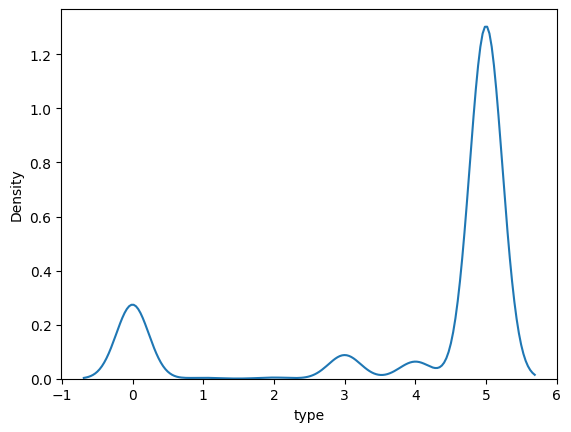

In [18]:
# let's see if distribution of dataset
for col in df.columns:
    sns.kdeplot(df[col])
    plt.show()

The columns are not completely normally distributed and there is also multicollinearity in the dataset so we will use decsion tree regressor instead of linear regression. We would use linear regression after applying Transformations like log,box-cox,yeo-johnson. Sometimes they work fine but sometimes not.It's dependent on your dataset and the problem.

In [19]:
imputer = KNNImputer(n_neighbors=5,weights='uniform')

In [20]:
X = df.drop('price',axis=1)
y = df['price']

X_trf = imputer.fit_transform(X)

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X_trf, y, random_state=44,test_size=0.2)

In [22]:
dt = DecisionTreeRegressor(max_depth=20, criterion='squared_error',splitter='random')

dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=20, splitter='random')

In [23]:
pred = dt.predict(X_test)

In [24]:
r2_score(y_test,pred)

0.7865908467851928

First I was getting the r2 score of 0.76 but after hyperparameter tuning the model performance had improved.

Let's train rnadom forest

In [32]:
rf = RandomForestRegressor(criterion='squared_error', max_depth=None, n_estimators= 200)

rf.fit(X_train,y_train)

rf_pred = rf.predict(X_test)

r2_score(y_test,rf_pred)

0.8728676245522824

Let's apply some hyperparameter tuning but this time we will use gridsearch for tuning we will not do this manually

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 150, 200],
   'max_depth': [None, 5, 10, 15],
    'criterion': ['squared_error','mae']
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, verbose=3)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END criterion=squared_error, max_depth=None, n_estimators=100;, score=0.857 total time=  12.5s
[CV 2/5] END criterion=squared_error, max_depth=None, n_estimators=100;, score=0.865 total time=  13.5s
[CV 3/5] END criterion=squared_error, max_depth=None, n_estimators=100;, score=0.842 total time=  12.4s
[CV 4/5] END criterion=squared_error, max_depth=None, n_estimators=100;, score=0.855 total time=  11.7s
[CV 5/5] END criterion=squared_error, max_depth=None, n_estimators=100;, score=0.896 total time=  11.7s
[CV 1/5] END criterion=squared_error, max_depth=None, n_estimators=150;, score=0.859 total time=  17.4s
[CV 2/5] END criterion=squared_error, max_depth=None, n_estimators=150;, score=0.865 total time=  17.4s
[CV 3/5] END criterion=squared_error, max_depth=None, n_estimators=150;, score=0.841 total time=  17.4s
[CV 4/5] END criterion=squared_error, max_depth=None, n_estimators=150;, score=0.854 total time=  17.5s
[C

C:\Users\Tesla Laptops\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Tesla Laptops\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Tesla Laptops\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'mae'],
                         'max_depth': [None, 5, 10, 15],
                         'n_estimators': [100, 150, 200]},
             verbose=3)

In [31]:
grid_search.best_params_


{'criterion': 'squared_error', 'max_depth': None, 'n_estimators': 200}

In [30]:
grid_search.best_score_


0.8640223239078006